In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [3]:
file = open("settings2.yaml")
settings = yaml.load(file,Loader=yaml.BaseLoader)
print(settings)
SplitDataPath = settings.get("BraTS2020").get("SplitDataPath")

{'BraTS2020': {'TrainingDataPath': '/home/luxiwen/Datasets/BraTS2020/MICCAI_BraTS2020_TrainingData/', 'PreprocessedDataPath': '/home/luxiwen/Datasets/BraTS2020/preTrain', 'SplitDataPath': '/home/luxiwen/Datasets/BraTS2020/input_data_128'}}


In [21]:
def noisy(noise_typ, image):
    if noise_typ == "gauss":
        row, col = image.shape
        mean = 0
        var = 0.1
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col))
        gauss = gauss.reshape(row, col)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row, col = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        out[tuple(coords)] = 1

        # Pepper mode
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
        out[tuple(coords)] = 0
        return out

    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ == "speckle":
        row, col = image.shape
        gauss = np.random.randn(row, col )
        gauss = gauss.reshape(row, col )
        noisy = image + image * gauss
        return noisy

In [11]:
val_origin_datapath = os.path.join(SplitDataPath,"val","images","")
val_orgin_list = os.listdir(val_origin_datapath)

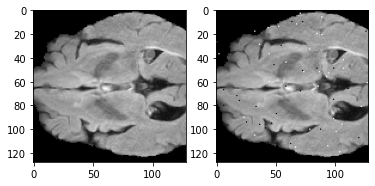

In [23]:
for n in val_orgin_list:
    img = np.load(os.path.join(val_origin_datapath,n))
    img = img[:,:,60,0]
    noise_img = noisy("s&p",img)

    plt.subplot(121)
    plt.imshow(img,cmap='gray')
    plt.subplot(122)
    plt.imshow(noise_img,cmap='gray')
    plt.show()
    break

In [29]:
from tqdm import tqdm
for mode in ['gauss','s&p','poisson','speckle']:
    for n in tqdm(val_orgin_list):
        img = np.load(os.path.join(val_origin_datapath,n))
        img_noise = []
        for t in range(3):
            img_t = img[:,:,:,t]
            n_img = []
            for slice in range(128):
                noise_img = noisy(mode,img_t[:,:,slice])
                n_img.append(noise_img)
            n_img = np.array(n_img)
            img_noise.append(n_img)
        np.save(os.path.join(SplitDataPath,"val",mode,n),np.array(img_noise))

In [24]:
img.shape[0]

128

In [25]:
np.load(os.path.join(val_origin_datapath,n)).shapedd

(128, 128, 128, 3)